#                                          Clustering and Neighborhood Analysis - Hyderabad

As a business problem in this project we look at the beautiful city of Hyderabad(also known as city of pearls and twin city) and specifically analyse and group areas within the city which are best suitable for investment in residential property. Areas of interest for the analysis are fetched from an online property sale site(https://www.99acres.com). The data from a webpage lists the trends and prices of properties for buying or investing in the city.We use the average prices of the property.Thereafter we use Nominatim API to extrat the geo-coordinates of different areas in the city and in association with FourSquare API, geographical details/analysis of venues/places in the neighborhoods of the city is performed. Finally based on the similarity of the areas we cluster areas using K-Means algorithm. We also consider prices to investigate on the best places of investment.

#### 1. As a first step we import all the necessary libraries required to perform the task in hand

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### 2. Data details from online site(https://www.99acres.com/property-rates-and-price-trends-in-hyderabad)

It can be observed that the webpage includes both Residential Apartments as well as Residential Land under Localities in Hyderabad, we will be focusing on Resindential Land for investment. Details of the data consists of area wise maximum,minimum prices, trends over each Quarter, percentage increase or decrease in the costs. We will only focus on the max and min prices of the property due to unavailability of complete data for other categories of information in the webpage. 

From the webpage, columns of Locality, Price range are copied to local file and saved in csv format. Data is cleaned by seperating the minimum and maximum prices from the price range column. Saved data is then uploaded to the workspace in the cloud under datasets category. Finally data from the workspace is read into a dataframe and displayed.
Note: The cost is represented in Rs/SqYd i.e. Rupees per Square Yard.

In [2]:
# The code was removed by Watson Studio for sharing.

,Locality,Price_Min_Rs_per_SqYd,Price_Max_Rs_per_SqYd
0,Appa Junction,26392,35190
1,Bhanur,13005,16065
2,Boduppal,26775,31365
3,Dubbacharla,6885,6885
4,Financial District,12622,12622


#### 3. Extracting mean/average price of the property

Here we calculate the average/mean price of property for ease of analysing the price in different areas. Mean price is calculated using mean function and the values are assigned to a new column 'Avg_Price_Rs_per_SqYd'

In [3]:
df_data["Avg_Price_Rs_per_SqYd"]=df_data.mean(axis=1)
df_data.head()

,Locality,Price_Min_Rs_per_SqYd,Price_Max_Rs_per_SqYd,Avg_Price_Rs_per_SqYd
0,Appa Junction,26392,35190,30791.0
1,Bhanur,13005,16065,14535.0
2,Boduppal,26775,31365,29070.0
3,Dubbacharla,6885,6885,6885.0
4,Financial District,12622,12622,12622.0


#### 4. Vizualization of the prices through a bar chart

For better understanding of the data visually we plot a bar chart showing the Avg price against different areas of the city. The prices are arranged in the decreasing order of the average price.

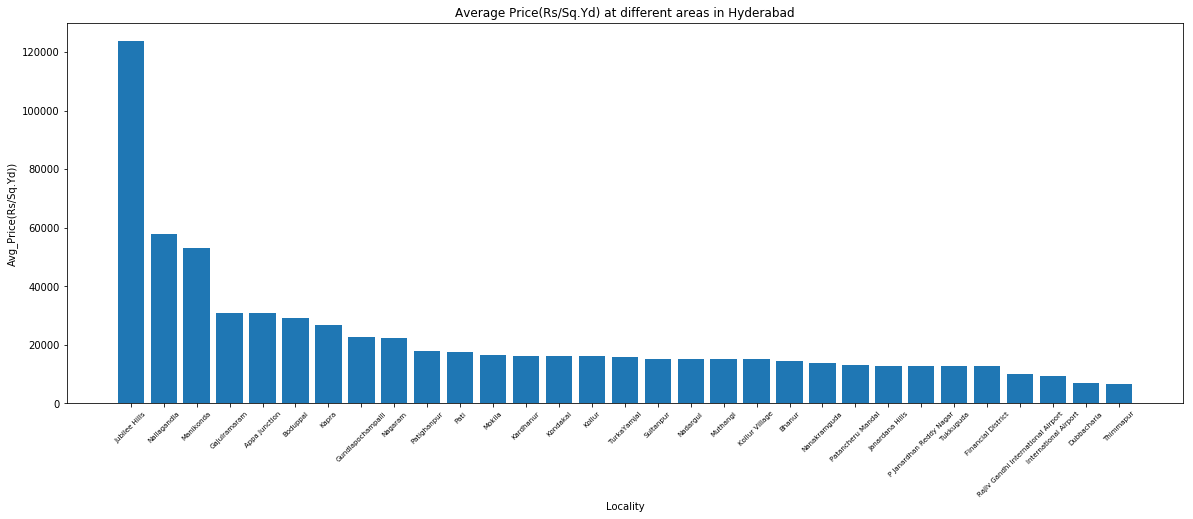

In [4]:
df_data.sort_values('Avg_Price_Rs_per_SqYd',ascending=False,inplace=True)
plt.figure(figsize=(20,7))
plt.bar(df_data.Locality, df_data.Avg_Price_Rs_per_SqYd)
plt.xlabel('Locality', fontsize=10)
plt.ylabel('Avg_Price(Rs/Sq.Yd))', fontsize=10)
plt.xticks(df_data.Locality, df_data.Locality, fontsize=7, rotation=45)
plt.title('Average Price(Rs/Sq.Yd) at different areas in Hyderabad')
plt.show()


It can be seen that Jubliee Hills has the highest average price per SqYd. While this is known fact that Jubliee Hills is a high quality posh area within the city with maximum prices reaching unusually high, the statement is further reignforced with this data driven display. Further more interstingly Nallagandla is at the 2nd place in terms of avg price which was not so in the recent past.

#### 5. Fetching coordinates of areas in the city

In order to analyse the localities using information of the venues in these areas, we need Latitude and Longitude values of the areas. While some of the coordinates are fetch from Nominatim Open Street Map(https://nominatim.openstreetmap.org) few of them are fetch from google Maps due to 
non-availability of the data in Nominatim webpage. 

Data from these sites are fetched manually and written to a .csv file. The file is then uploaded into the IBM cloud workspace under datasets category. Coordinates from the file are extracted locality wise and loaded into a dataframe using below method. 

In [5]:
# The code was removed by Watson Studio for sharing.

,Locality,Latitude,Longitude
0,Appa Junction,17.349710,78.360158
1,Bhanur,17.478825,78.169449
2,Boduppal,17.416539,78.580225
3,Dubbacharla,17.107689,78.370912
4,Financial District,17.412001,78.343023


##### 6. Merge Latitiude Longitude data to df_data dataframe 

The coordinates data from the file is merged with the initial property Prices into a single dataframe as displayed below

In [6]:
df_data_final = df_data.merge(df_lat_long, on="Locality", how="left")
df_data_final.head()

,Locality,Price_Min_Rs_per_SqYd,Price_Max_Rs_per_SqYd,Avg_Price_Rs_per_SqYd,Latitude,Longitude
0,Jubilee Hills,110160,137318,123739.0,17.432707,78.407197
1,Nallagandla,52785,62730,57757.5,17.467395,78.306118
2,Manikonda,50872,55080,52976.0,17.409073,78.372567
3,Gajulramaram,27540,34042,30791.0,17.535292,78.403920
4,Appa Junction,26392,35190,30791.0,17.349710,78.360158


#### 7. Remove duplicate records from the data

It is observed that there are duplicate entries of the Locality due to different names being used for the same Locality like 'International Airport' has different entry though there is similar Locality which is 'Ragiv Gandhi International Airport' which are one and the same. Hence we remove one entry from the data. 

In [7]:
df_data_final=df_data_final[df_data_final.Locality != 'International Airport']
df_data_final.shape

(30, 6)

#### 8. Extract coordinates of Hyderabad using Nominatim API

Using the Nominatim API we extract the coordiantes of the city Hyderabad.

In [8]:
address = 'Hyderabad, India'

geolocator = Nominatim(user_agent="hyd_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hyderabad are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hyderabad are 17.38878595, 78.4610647345315.


#### 9. Visualizing areas on Hyderabad using Folium

Using the latitude and longitude details of different areas in the dataframe we plot the coordinates using a Folium Map centered at Hyderabad coordinates. We mark the points using different attributes of folium.Circlemarker. Using folium.popup we provide hints which displays the area name and the city name upon hovering over the data points in the map.

In [9]:
map_hyd = folium.Map(location=[latitude, longitude], zoom_start=10)
counter=0
# add markers to map
for lat, lng, area in zip(df_data_final['Latitude'], df_data_final['Longitude'], df_data_final['Locality']):
    label = '{},''Hyderabad'''.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_hyd)  

map_hyd


From the previous plot it is clearly evident that much of the investor interest is in the Western and North Western part of the city with majority of the price listings from the Localities concentrated in this region of the city. Possible reason for this could be due to numerous Industries which cover the North Western region and large number of IT companies in the Western region. Yet another interesting observation is that much of the points are adjacent to the Outer Ring Road which is an expressway encircling the city. 

#### 10 .Visual Analysis of the prices in different areas using heatmap

In order to visualize the price ranges geographically we now embed the average prices in these areas over the map in the form of a Heat map which best explains the weight/intensity of a variable on a map.Below code displays the heat map of the average prices in different areas. 

In [10]:

from folium.plugins import HeatMap
HeatMap(data=df_data_final[['Latitude', 'Longitude', 'Avg_Price_Rs_per_SqYd']].values.tolist(), gradient={0.3:'blue',0.65:'lime',1:'red'} ,radius=15, max_zoom=13).add_to(map_hyd)

map_hyd

Complimenting to our earlier observation it is notable that the prices of the land in the West/North-West areas are high. 
Thus it is understood that West/North-West regions are the most happening places in the city for investment. 

#### 11. Now lets explore places around these areas

We use the credentials of Foursquare API for exploring the venues around these areas

In [11]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: KAY051QJZJXTZM1GACJEVHN41L44LCKM3DQL3QH1UR0TLMGM
CLIENT_SECRET:AC3JMCGPNDRRVTQJPRHSOHQREM5PFO0MEQJKOK1KB4ORQ2PI


#### 12. Exploration of Venues and Merging coordinates with the grouped dataframe based on Locality

Each area around the Localities within the radius of 1000 meters is explored for fetching the top 100 venues using fourquare API. Inputs for the API include radius,number of venues,Latitude and Longitude. The fetched venues are merged with the original dataframe.

In [12]:
radius = 1000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(df_data_final['Latitude'], df_data_final['Longitude'], df_data_final['Locality']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

#### 13. Creating dataFrame with the list of venues

List of Locality(Neighborhood), Latitude, Longitude, Venues and the corresponding coordinates are convereted to a dataframe and column names are assigned.

In [13]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood','Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(228, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Jubilee Hills,17.432707,78.407197,Cream Stone Concepts,17.430823,78.408039,Ice Cream Shop
1,Jubilee Hills,17.432707,78.407197,Conçu Cakes,17.431740,78.408065,Cupcake Shop
2,Jubilee Hills,17.432707,78.407197,Lasermaxx,17.431772,78.406630,Gaming Cafe
3,Jubilee Hills,17.432707,78.407197,Kavanah Patisserie & More,17.433271,78.408364,Deli / Bodega
4,Jubilee Hills,17.432707,78.407197,Di Bella Coffee,17.430678,78.408683,Coffee Shop


Number of venues returned are displayed by grouping them based on Neighborhood

In [14]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Appa Junction,1,1,1,1,1,1
Bhanur,1,1,1,1,1,1
Boduppal,1,1,1,1,1,1
Financial District,7,7,7,7,7,7
Gajulramaram,1,1,1,1,1,1
Janardana Hills,28,28,28,28,28,28
Jubilee Hills,69,69,69,69,69,69
Kapra,4,4,4,4,4,4
Manikonda,2,2,2,2,2,2


In [15]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 88 uniques categories.


#### 15. Pre-Processing for Data Modelling

Below steps are performed as pre-processing steps before the data is used for modelling 

In [16]:
hyd_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hyd_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = list(hyd_onehot.columns[-1:]) + list(hyd_onehot.columns[:-1])
hyd_onehot = hyd_onehot[fixed_columns]

print(hyd_onehot.shape)
hyd_onehot.head()

(228, 89)


,Neighborhoods,ATM,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bike Rental / Bike Share,Bistro,Bookstore,Bowling Alley,Brewery,Buffet,Bus Stop,Cafeteria,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Duty-free Shop,Electronics Store,Fast Food Restaurant,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Grocery Store,Gym,Hookah Bar,Hotel,Hotel Pool,Hunan Restaurant,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Liquor Store,Lounge,Mediterranean Restaurant,Mobile Phone Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,North Indian Restaurant,Pharmacy,Pizza Place,Pub,Racetrack,Restaurant,Sandwich Place,Scandinavian Restaurant,Snack Place,Soccer Field,Social Club,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Taxi Stand,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Volleyball Court,Women's Store
0,Jubilee Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Jubilee Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jubilee Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Jubilee Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Jubilee Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
hyd_grouped = hyd_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(hyd_grouped.shape)
hyd_grouped

(22, 89)


,Neighborhoods,ATM,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bike Rental / Bike Share,Bistro,Bookstore,Bowling Alley,Brewery,Buffet,Bus Stop,Cafeteria,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Duty-free Shop,Electronics Store,Fast Food Restaurant,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Grocery Store,Gym,Hookah Bar,Hotel,Hotel Pool,Hunan Restaurant,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Liquor Store,Lounge,Mediterranean Restaurant,Mobile Phone Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,North Indian Restaurant,Pharmacy,Pizza Place,Pub,Racetrack,Restaurant,Sandwich Place,Scandinavian Restaurant,Snack Place,Soccer Field,Social Club,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Taxi Stand,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Volleyball Court,Women's Store
0,Appa Junction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Bhanur,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Boduppal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Financial District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0

#### 16. Extracting top 10  most common venues for each Locality  

In [18]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['Neighborhoods']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = hyd_grouped['Neighborhoods']

for ind in np.arange(hyd_grouped.shape[0]):
    row_categories = hyd_grouped.iloc[ind, :].iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    neighborhoods_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:num_top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(22, 11)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Appa Junction,Athletics & Sports,Women's Store,Duty-free Shop,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store
1,Bhanur,Indie Movie Theater,Women's Store,Dessert Shop,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega
2,Boduppal,Pizza Place,Women's Store,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega
3,Financial District,Café,Hotel,Coffee Shop,Food Court,Pizza Place,Spa,South Indian Restaurant,Deli / Bodega,Clothing Store,Cocktail Bar
4,Gajulramaram,Multiplex,Grocery Store,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega


#### 17. K-Means Clustering

In order to understand the areas which are similar in nature with respect to venues we will be clustering neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. Using the cluster size venues of similar nature one can choose areas which are similar in nature for investing taking into consideration the prices of the property in different areas. In our case, we go with 5 groups.

In [19]:
# number of clusters
kclusters = 6

hyd_grouped_clustering = hyd_grouped.drop(["Neighborhoods"], 1)

# k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hyd_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_.shape

(22,)

We now add together the clustering labels to the original dataframe which contains Locality, Venue details etc.

In [20]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

list1=neighborhoods_venues_sorted['Neighborhoods']
list2=df_data_final['Locality']
df_data_final=df_data_final[list2.isin(list1)]

hyd_merged = df_data_final.copy()
list1.shape
hyd_merged.shape
# add clustering labels
hyd_merged["Cluster Labels"] = kmeans.labels_

neighborhoods_venues_sorted_new=neighborhoods_venues_sorted.rename(columns={"Neighborhoods":"Locality"})
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood

#a=pd.concat([hyd_merged,neighborhoods_venues_sorted_new],sort=False)
hyd_merged_new=pd.merge(hyd_merged,neighborhoods_venues_sorted_new,on="Locality")
hyd_merged_new.head()
#hyd_merged.head() # check the last columns!

,Locality,Price_Min_Rs_per_SqYd,Price_Max_Rs_per_SqYd,Avg_Price_Rs_per_SqYd,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Jubilee Hills,110160,137318,123739.0,17.432707,78.407197,1,Café,Indian Restaurant,Coffee Shop,Brewery,Lounge,Hookah Bar,Gym,Cocktail Bar,Italian Restaurant,Chinese Restaurant
1,Nallagandla,52785,62730,57757.5,17.467395,78.306118,0,Supermarket,Indian Restaurant,Convenience Store,Food Truck,Athletics & Sports,Duty-free Shop,Coffee Shop,Comfort Food Restaurant,Cupcake Shop,Dance Studio
2,Manikonda,50872,55080,52976.0,17.409073,78.372567,5,Bakery,Restaurant,Dessert Shop,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega
3,Gajulramaram,27540,34042,30791.0,17.535292,78.403920,0,Multiplex,Grocery Store,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega
4,Appa Junction,26392,35190,30791.0,17.349710,78.360158,3,Athletics & Sports,Women's Store,Duty-free Shop,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store


In [21]:
# sort the results by Cluster Labels
hyd_merged_new.sort_values(["Cluster Labels"], inplace=True)
hyd_merged_new

,Locality,Price_Min_Rs_per_SqYd,Price_Max_Rs_per_SqYd,Avg_Price_Rs_per_SqYd,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Mokila,15300,17978,16639.0,17.436873,78.190427,0,ATM,Athletics & Sports,Duty-free Shop,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store
1,Nallagandla,52785,62730,57757.5,17.467395,78.306118,0,Supermarket,Indian Restaurant,Convenience Store,Food Truck,Athletics & Sports,Duty-free Shop,Coffee Shop,Comfort Food Restaurant,Cupcake Shop,Dance Studio
19,Financial District,12622,12622,12622.0,17.412001,78.343023,0,Café,Hotel,Coffee Shop,Food Court,Pizza Place,Spa,South Indian Restaurant,Deli / Bodega,Clothing Store,Cocktail Bar
3,Gajulramaram,27540,34042,30791.0,17.535292,78.403920,0,Multiplex,Grocery Store,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega
18,Tukkuguda,12622,12622,12622.0,17.210545,78.476297,0,Movie Theater,Pharmacy,Restaurant,Deli / Bodega,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop
5,Boduppal,26775,31365,29070.0,17.416539,78.580225,0,Pizza Place,Women's Store,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega
6,Kapra,24480,29070,26775.0,17.489166,78.571774,0,ATM,Convenience Store,Pharmacy,Bakery,Fried Chicken Joint,Deli / Bodega,Cocktail Bar,Furniture / Home Store,Coffee Shop,Comfort Food Restaurant
7,Nagaram,21038,23715,22376.5,17.484123,78.607206,0,Food Truck,Women's Store,Dessert Shop,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega
8,Patighanpur,16830,18742,17786.0,17.507460,78.243907,0,Movie Theater,Women's Store,Grocery Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega
17,P Janardhan Reddy Nagar,12622,12622,12622.0,17.441167,78.366652,0,Indian Restaurant,Chinese Restaurant,Ice Cream Shop,Bakery,Fast Food Restaurant,Pizza Place,Sandwich Place,Coffee Shop,Mobile Phone Shop,Japanese Restaurant


#### 18. Visualization of the Cluster on Map

Labels assigned to each of the Localities is then plotted onto the map with different colour using Folium API.

In [22]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, locality, cluster in zip(hyd_merged_new['Latitude'], hyd_merged_new['Longitude'], hyd_merged_new['Locality'], hyd_merged_new['Cluster Labels']):
    label = folium.Popup('{} - Cluster {}'.format(locality, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### 19. Studying each Clusters individually 

In [23]:
hyd_merged_new.loc[hyd_merged_new['Cluster Labels'] == 0]

,Locality,Price_Min_Rs_per_SqYd,Price_Max_Rs_per_SqYd,Avg_Price_Rs_per_SqYd,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Mokila,15300,17978,16639.0,17.436873,78.190427,0,ATM,Athletics & Sports,Duty-free Shop,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store
1,Nallagandla,52785,62730,57757.5,17.467395,78.306118,0,Supermarket,Indian Restaurant,Convenience Store,Food Truck,Athletics & Sports,Duty-free Shop,Coffee Shop,Comfort Food Restaurant,Cupcake Shop,Dance Studio
19,Financial District,12622,12622,12622.0,17.412001,78.343023,0,Café,Hotel,Coffee Shop,Food Court,Pizza Place,Spa,South Indian Restaurant,Deli / Bodega,Clothing Store,Cocktail Bar
3,Gajulramaram,27540,34042,30791.0,17.535292,78.403920,0,Multiplex,Grocery Store,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega
18,Tukkuguda,12622,12622,12622.0,17.210545,78.476297,0,Movie Theater,Pharmacy,Restaurant,Deli / Bodega,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop
5,Boduppal,26775,31365,29070.0,17.416539,78.580225,0,Pizza Place,Women's Store,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega
6,Kapra,24480,29070,26775.0,17.489166,78.571774,0,ATM,Convenience Store,Pharmacy,Bakery,Fried Chicken Joint,Deli / Bodega,Cocktail Bar,Furniture / Home Store,Coffee Shop,Comfort Food Restaurant
7,Nagaram,21038,23715,22376.5,17.484123,78.607206,0,Food Truck,Women's Store,Dessert Shop,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega
8,Patighanpur,16830,18742,17786.0,17.507460,78.243907,0,Movie Theater,Women's Store,Grocery Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega
17,P Janardhan Reddy Nagar,12622,12622,12622.0,17.441167,78.366652,0,Indian Restaurant,Chinese Restaurant,Ice Cream Shop,Bakery,Fast Food Restaurant,Pizza Place,Sandwich Place,Coffee Shop,Mobile Phone Shop,Japanese Restaurant


In [24]:
hyd_merged_new.loc[hyd_merged_new['Cluster Labels'] == 1]

,Locality,Price_Min_Rs_per_SqYd,Price_Max_Rs_per_SqYd,Avg_Price_Rs_per_SqYd,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Jubilee Hills,110160,137318,123739.0,17.432707,78.407197,1,Café,Indian Restaurant,Coffee Shop,Brewery,Lounge,Hookah Bar,Gym,Cocktail Bar,Italian Restaurant,Chinese Restaurant
9,Pati,16830,18360,17595.0,17.493985,78.238534,1,ATM,Volleyball Court,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store


In [25]:
hyd_merged_new.loc[hyd_merged_new['Cluster Labels'] == 2]

,Locality,Price_Min_Rs_per_SqYd,Price_Max_Rs_per_SqYd,Avg_Price_Rs_per_SqYd,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Patancheru Mandal,11858,14535,13196.5,17.528824,78.265740,2,ATM,Music Venue,Accessories Store,Dessert Shop,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio
16,Janardana Hills,12622,12622,12622.0,17.435982,78.368646,2,Indian Restaurant,Bakery,Asian Restaurant,Scandinavian Restaurant,Bistro,Coffee Shop,Italian Restaurant,Chinese Restaurant,Irani Cafe,Department Store
21,Thimmapur,6120,7268,6694.0,17.167167,78.295430,2,Train Station,Indian Restaurant,Women's Store,Dessert Shop,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio


In [26]:
hyd_merged_new.loc[hyd_merged_new['Cluster Labels'] == 3]

,Locality,Price_Min_Rs_per_SqYd,Price_Max_Rs_per_SqYd,Avg_Price_Rs_per_SqYd,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Appa Junction,26392,35190,30791.0,17.34971,78.360158,3,Athletics & Sports,Women's Store,Duty-free Shop,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store


In [27]:
hyd_merged_new.loc[hyd_merged_new['Cluster Labels'] == 4]

,Locality,Price_Min_Rs_per_SqYd,Price_Max_Rs_per_SqYd,Avg_Price_Rs_per_SqYd,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,TurkaYamjal,13770,17978,15874.0,17.270651,78.580953,4,ATM,Volleyball Court,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store


#### 20. Results and Observations

We now try to understand the clusters and come up with suggestions based on individual choice of the surroundings of each area.
Cluster 0 as seen from the Cluster Map is distributed across the city. Relating these observations with the prices map, property prices of these areas in the normal range. Areas under this cluster have many of the amenities typically required for urban living like ATM, 
Restaurant, Supermarket, Pharmacy and Cloth Stores. These areas could be an ideal choice if someone wants to buy a property and immediately move in. Except for few areas in this cluster most of the areas are within the Outer Ring Road thus ensuring minimal distance from the heart of the city.
Cluster 1 has areas which are covered with few restaurants and Coffee Shops. Property cost in these areas is not as high as that of Cluster 1 which has Jubliee hills,Nallagandla etc which are very costly. Owing to the limited facilities in this cluster, nominal costs in these areas can be understood.
Cluster 2 is filled with areas around the Airport where facilities are limited. Also w.r.t to cost, properties in this area are less costly compared to others.
Cluster 3 and Cluster 4 have limited amenties for living in these areas. Cluster 4 which contains appa junction is comparatively costly than other areas in Cluster 3 due to its proximity to IT corridor and Water Bodies. Appa Junction can also considered as a suitable place for investment owing to its nominal cost and facilities.

#### 21. Conclusion

This project helps anyone intereted in investing in residential properties of Hyderabad by giving necessary overview of the best localities based on individual needs. In combination with the prices and clusters of similar venues this analysis best helps in decision making for investment. By further including population densities, industrial locations, roadways and water body proximity information this analysis can further be enhanced for better and holistic decision making. 